In [1]:
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
import warnings

In [2]:
data = pd.read_excel("SGI발급data.xlsx")

In [3]:
data.head()

,증권발급월,임차보증금액,계약기간시작일자,계약기간종료일자,지역,구,소재지기본주소,건물면적
0,201501,85000000,20141113,20161112,강원도,NaN,강원 원주시 원동 274-4,84.00
1,201501,190000000,20150105,20170105,경기도,NaN,경기 김포시 풍무동 759,118.63
2,201501,210000000,20141231,20161231,경기도,NaN,경기 남양주시 별내동 872,124.06
3,201501,120000000,20150116,20160115,경기도,NaN,경기 남양주시 별내면,59.89
4,201501,37000000,20140620,20160619,경기도,NaN,경기 시흥시 거모동 612-1,25.12


In [4]:
data.계약기간시작일자 = data.계약기간시작일자.astype("object")
data.계약기간종료일자 = data.계약기간종료일자.astype("object")
data.임차보증금액 = data.임차보증금액/1000000

In [5]:
round(data.describe(), 2)

,증권발급월,임차보증금액,건물면적
count,2291.00,2291.00,2291.00
mean,201507.36,276.28,185.89
std,3.47,175.69,2625.12
min,201501.00,10.00,11.00
25%,201504.00,170.00,60.23
50%,201508.00,240.00,84.90
75%,201511.00,340.00,101.97
max,201512.00,2000.00,91716.60


In [6]:
# 한글 깨짐 보정

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
    

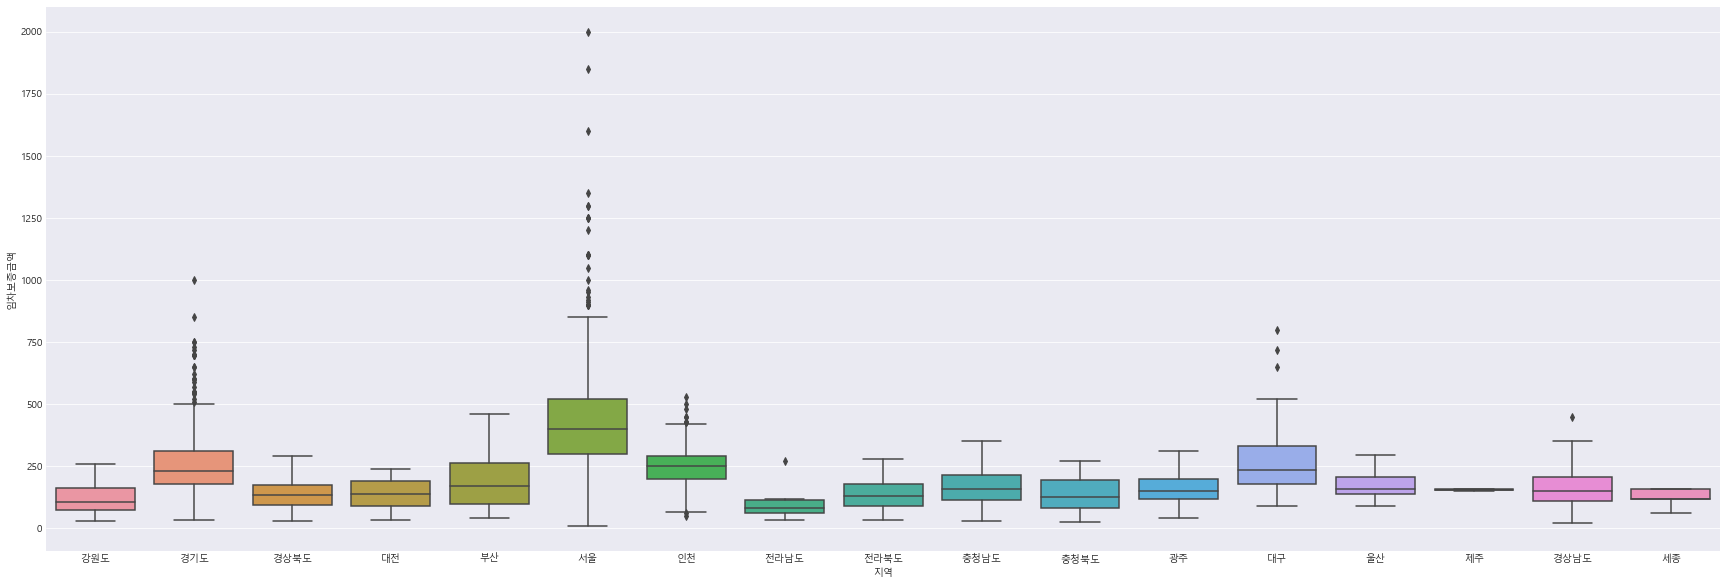

In [7]:
plt.figure(figsize = (30,10))
sns.boxplot(y = "임차보증금액", x = '지역', data = data, orient = 'v' )

In [8]:
kn = data[lambda x : x['지역']== '경상남도']
data.loc[np.argmax(kn['임차보증금액']), :]

C:\Users\hawi7\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


증권발급월              201511
임차보증금액                450
계약기간시작일자         20151030
계약기간종료일자         20171029
지역                   경상남도
구                     NaN
소재지기본주소     창원 성산구 반림동 18
건물면적               129.52
Name: 1939, dtype: object

In [9]:
print(round(data.groupby("지역").mean()["임차보증금액"], 2))
print(round(data.groupby("지역").median()["임차보증금액"], 2))

지역
강원도     117.33
경기도     260.06
경상남도    163.84
경상북도    137.08
광주      158.43
대구      271.41
대전      140.76
부산      188.94
서울      437.32
세종      124.00
울산      178.71
인천      242.73
전라남도     95.92
전라북도    135.85
제주      155.00
충청남도    169.80
충청북도    139.23
Name: 임차보증금액, dtype: float64
지역
강원도     107.5
경기도     230.0
경상남도    150.0
경상북도    132.5
광주      150.0
대구      235.0
대전      140.0
부산      170.0
서울      400.0
세종      120.0
울산      160.0
인천      250.0
전라남도     80.0
전라북도    130.0
제주      155.0
충청남도    160.0
충청북도    125.0
Name: 임차보증금액, dtype: float64


In [10]:
data.groupby("지역").count()

,증권발급월,임차보증금액,계약기간시작일자,계약기간종료일자,구,소재지기본주소,건물면적
지역,,,,,,,
강원도,30,30,30,30,0,30,30
경기도,668,668,668,668,0,668,668
경상남도,86,86,86,86,0,86,86
경상북도,72,72,72,72,0,72,72
광주,21,21,21,21,0,21,21
대구,92,92,92,92,0,92,92
대전,41,41,41,41,0,41,41
부산,125,125,125,125,0,125,125
서울,561,561,561,561,561,561,561


---
전세금 상승이 지속되고 있다. 깡통전세의 위험이 커짐에 따라 전세금을 보장할 수 있는 상품의 수요도 커지고 있다. 전세금 보장 상품은 주택도시보증공사(HUG)의 “전세보증금반환보증”과 서울보증보험(SGI)의 “전세금보장신용보험”이 있다. HUG 는 전세보증금 400 백만원(수도권 이외는 300 백만원) 까지만 보장가능 하지만 SGI 는 금액제한이 없다. 

두 방송사에서 HUG 의 보증금액을 현실화 시켜야 한다는 주장을 펼치고 있다. SGI 의 전세금보장신용보험 발급건(붙임 참조)에서 표본을 추출하여 평균 전세금을 구하여 보니 A 방송사는 683 백만원, B 방송사는 514 백만원을 발표했다. 이에 기초하여 A 방송사는 600 백만원, B 방송사는 500 백만원으로 보증금액 한도를 상향해야 한다고 주장하고 있다.

### Q1 : 방송사 A,B 의 주장의 문제점을 지적하고, 새롭게 주장하는 상향 조정된 보증금액에  대하여 논하라.

<img src="두 상품 비교.jpg" width = "500">

먼저 전세금을 보장해주는 보험에 대해서 이해하기 위해 HUG와 SGI의 최근 가입조건 및 상품 설명을 살펴보자. 이를 살펴보면 HUG와 SGI를 직접 비교하기에는 무리가 있다. 두 상품의 조건의 중요한 차이점은 두가지로 요약할 수 있다.

- 가입조건의 차이 : HUG는 금액 제한이 있지만 SGI의 경우 금액제한이 없다.
- 보증한도 금액의 차이 : HUG는 80%/60%, SGI의 경우 신청 금액 전체

따라서 SGI의 자료를 이용해서 상황을 해석하여 HUG에 적용하기에는 문제가 있다. 이유를 정리하면 크게 두가지 이유를 파악할 수 있다. 두 방송사가 SGI 자료를 표본추출하여 평균을 구한 값이 1억 가까이 차이가 남을 확인할 수 있다. SGI 자료는 변동이 큰 자료이며 지역별로 파악해보아도 통상적인 가격 범위를 벗어나는 대상이 서울, 경기지역을 중심으로 매우 차이가나는 것을 확인할 수 있다. 따라서 보증금액의 상향을 논하기에는 평균이나 중간값이 적절한 지표가 될 수 없다. 또한 보증한도의 적용 비율이 HUG의 경우 80%/60%로 보장범위가 다르며, 가입조건의 제한이 존재하기 때문에 SGI의 전체 데이터에서 표본을 추출한 값을 비교대상으로 사용하기에는 문제가 있다. 

### Q2: HUG 정책 담당자의 입장에서 새로운 보증금액 한도 산출을 위한 객관적이고 타당한 절차를 제시하라.

In [11]:
def mapper(x) :
    if x == "서울" or x == "경기도" :
        return '수도권'
    else :
        return '비수도권'

In [12]:
data['수도권분류'] = data.지역.apply(mapper)

In [13]:
round(data.groupby('수도권분류').mean(), 2)

,증권발급월,임차보증금액,건물면적
수도권분류,,,
비수도권,201507.12,201.42,152.34
수도권,201507.57,340.97,214.89


In [14]:
data.groupby('수도권분류').count()

,증권발급월,임차보증금액,계약기간시작일자,계약기간종료일자,지역,구,소재지기본주소,건물면적
수도권분류,,,,,,,,
비수도권,1062,1062,1062,1062,1062,0,1062,1062
수도권,1229,1229,1229,1229,1229,561,1229,1229


In [15]:
data["면적 당 보증금"] = round(data.임차보증금액/ data.건물면적, 2)

In [16]:
data.groupby('수도권분류')['임차보증금액'].describe()

,count,mean,std,min,25%,50%,75%,max
수도권분류,,,,,,,,
비수도권,1062.0,201.416196,96.384079,20.0,130.0,200.0,260.0,800.0
수도권,1229.0,340.970708,201.237667,10.0,210.0,300.0,420.0,2000.0


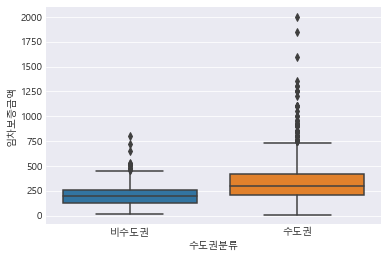

In [25]:
sns.boxplot(y = data.임차보증금액, x = data.수도권분류)

In [33]:
Seoul = data.loc[lambda x : x["수도권분류"]=='수도권','임차보증금액']
other = data.loc[lambda x : x["수도권분류"]!='수도권', '임차보증금액']

In [34]:
Seoul_idx = round(len(Seoul)*0.8)
other_idx = round(len(other)*0.8)

In [42]:
print("=====  중산층 마지노선 건물 가치 ===== ")
print(sorted(Seoul)[Seoul_idx])
print(sorted(other)[other_idx])
print("=====  건물가치에 따른 보증 한도 ===== ")
print(round(4.6 * 0.8,1))
print(round(2.8 * 0.8,2))


=====  중산층 마지노선 건물 가치 ===== 
460.0
280.0
=====  건물가치에 따른 보증 한도 ===== 
3.7
2.24


280.0

3.7

2.24

### Q3. HUG 는 서민 주거 안정을 통한 주거 복진 증진이라는 설립 이념을 갖고 있다. 그럼 “서민 주거”라고 할 수 있는 전세금 수준은 얼마인지 논하라.